In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split, Subset
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np
from torchvision import models

In [ ]:
transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
train_dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transforms)
test_dataset = datasets.CIFAR100(root='./data', train=False, download=True, transform=transforms)

class_names = train_dataset.classes
print(class_names)

Files already downloaded and verified
Files already downloaded and verified
['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tracto

In [ ]:
fine_name_to_index = {name: idx for idx, name in enumerate(class_names)}
print(fine_name_to_index)

{'apple': 0, 'aquarium_fish': 1, 'baby': 2, 'bear': 3, 'beaver': 4, 'bed': 5, 'bee': 6, 'beetle': 7, 'bicycle': 8, 'bottle': 9, 'bowl': 10, 'boy': 11, 'bridge': 12, 'bus': 13, 'butterfly': 14, 'camel': 15, 'can': 16, 'castle': 17, 'caterpillar': 18, 'cattle': 19, 'chair': 20, 'chimpanzee': 21, 'clock': 22, 'cloud': 23, 'cockroach': 24, 'couch': 25, 'crab': 26, 'crocodile': 27, 'cup': 28, 'dinosaur': 29, 'dolphin': 30, 'elephant': 31, 'flatfish': 32, 'forest': 33, 'fox': 34, 'girl': 35, 'hamster': 36, 'house': 37, 'kangaroo': 38, 'keyboard': 39, 'lamp': 40, 'lawn_mower': 41, 'leopard': 42, 'lion': 43, 'lizard': 44, 'lobster': 45, 'man': 46, 'maple_tree': 47, 'motorcycle': 48, 'mountain': 49, 'mouse': 50, 'mushroom': 51, 'oak_tree': 52, 'orange': 53, 'orchid': 54, 'otter': 55, 'palm_tree': 56, 'pear': 57, 'pickup_truck': 58, 'pine_tree': 59, 'plain': 60, 'plate': 61, 'poppy': 62, 'porcupine': 63, 'possum': 64, 'rabbit': 65, 'raccoon': 66, 'ray': 67, 'road': 68, 'rocket': 69, 'rose': 70, 

In [ ]:
superclass_to_fine_classes = {
    'aquatic_mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
    'fish': ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
    'flowers': ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
    'food_containers': ['bottle', 'bowl', 'can', 'cup', 'plate'],
    'fruit_and_vegetables': ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
    'household_electrical_devices': ['clock', 'keyboard', 'lamp', 'telephone', 'television'],
    'household_furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
    'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
    'large_carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
    'large_man_made_outdoor_things': ['bridge', 'castle', 'house', 'road', 'skyscraper'],
    'large_natural_outdoor_scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
    'large_omnivores_and_herbivores': ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
    'medium_mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
    'non_insect_invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
    'people': ['baby', 'boy', 'girl', 'man', 'woman'],
    'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
    'small_mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
    'trees': ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
    'vehicles_1': ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
    'vehicles_2': ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']
}

In [ ]:
selected_classes = [
    'aquatic_mammals',
    'fish',
    'flowers',
    'food_containers',
    'fruit_and_vegetables',
    'household_electrical_devices',
    'household_furniture',
    'insects',
    'large_carnivores',
    'large_man_made_outdoor_things',
    'large_natural_outdoor_scenes',
    'large_omnivores_and_herbivores',
    'medium_mammals',
    'non_insect_invertebrates',
    'people',
    'reptiles',
    'small_mammals',
    'trees',
    'vehicles_1',
    'vehicles_2'
]

In [ ]:
fine_to_superclass_index = {}
for super_idx, (superclass, fine_classes) in enumerate(superclass_to_fine_classes.items()):
    for fine_class in fine_classes:
        fine_index = fine_name_to_index[fine_class]
        fine_to_superclass_index[fine_index] = super_idx

In [ ]:
def map_labels(dataset, mapping):
    targets = [mapping[target] for target in dataset.targets]
    dataset.targets = targets
    return dataset

train_dataset = map_labels(train_dataset, fine_to_superclass_index)
test_dataset = map_labels(test_dataset, fine_to_superclass_index)

print(len(train_dataset), len(test_dataset))

50000 10000


In [ ]:
def create_smaller_dataset(dataset, subset_percent=0.3):
    num_samples = int(len(dataset) * subset_percent)
    indices = np.random.choice(len(dataset), num_samples, replace=False)
    smaller_dataset = Subset(dataset, indices)
    return smaller_dataset

train_set = create_smaller_dataset(train_dataset)
test_set = create_smaller_dataset(test_dataset)
print(len(train_set), len(test_set))

15000 3000


In [ ]:
calib_size = int(0.05 * len(train_set))
remaining_size = len(train_set) - calib_size

calib_set, train_set = random_split(train_set, [calib_size, remaining_size])

print(len(calib_set))

750


In [ ]:
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
calibration_loader = DataLoader(calib_set, batch_size=32, shuffle=True)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
model = models.efficientnet_b0().to(device)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, out_features=20)

cuda


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001)
def accuracy_function(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
from tqdm.auto import tqdm
def train_function(model, device, train_dataloader, loss_function, optimizer, accuracy_function):
  model.train()
  model = model.to(device)
  training_loss = 0
  trng_acc = 0
  for X_train, y_train in tqdm(train_dataloader):
    X_train, y_train = X_train.to(device), y_train.to(device)
    y_train_logits = model(X_train)
    loss = loss_function(y_train_logits, y_train)
    training_loss += loss.item()
    trng_acc += accuracy_function(y_train, torch.argmax(y_train_logits, dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  # find average loss per batch
  return (training_loss/len(train_dataloader), trng_acc/len(train_dataloader))

In [ ]:
for epoch in range(5):
  loss, acc = train_function(model, device, train_loader, loss_fn, optimizer, accuracy_function)
  print(f'epoch: {epoch+1} | loss: {loss:.4f} | accuracy: {acc:.4f}%')

  0%|          | 0/446 [00:00<?, ?it/s]

epoch: 1 | loss: 0.0857 | accuracy: 97.3963%


  0%|          | 0/446 [00:00<?, ?it/s]

epoch: 2 | loss: 0.0855 | accuracy: 97.3907%


  0%|          | 0/446 [00:00<?, ?it/s]

epoch: 3 | loss: 0.0840 | accuracy: 97.4496%


  0%|          | 0/446 [00:00<?, ?it/s]

epoch: 4 | loss: 0.0753 | accuracy: 97.7831%


  0%|          | 0/446 [00:00<?, ?it/s]

epoch: 5 | loss: 0.0763 | accuracy: 97.9246%


In [ ]:
model.eval()
model.to(device)
conformal_scores = []

with torch.inference_mode():
  for img, label in calibration_loader:
    img, label = img.to(device), label.to(device)
    outputs = model(img)
    softmax_scores = torch.softmax(outputs, dim=1)
    true_softmax = softmax_scores.gather(1, label.unsqueeze(1)).squeeze()
    conformal_scores.append(1-true_softmax)

conformal_scores = torch.cat(conformal_scores)
conformal_scores = conformal_scores.cpu().numpy()

In [ ]:
n = len(calib_set)
alpha = 0.05
q_level = np.ceil((n+1)*(1-alpha)) / n
qhat = np.quantile(conformal_scores, q_level, method='higher')
qhat

0.9999948

In [ ]:
import random
#select 10 indices from the test_data
test_indices = list(range(len(test_set)))
selected_indices = random.sample(test_indices, 10)
new_samples = torch.utils.data.Subset(test_set, selected_indices)

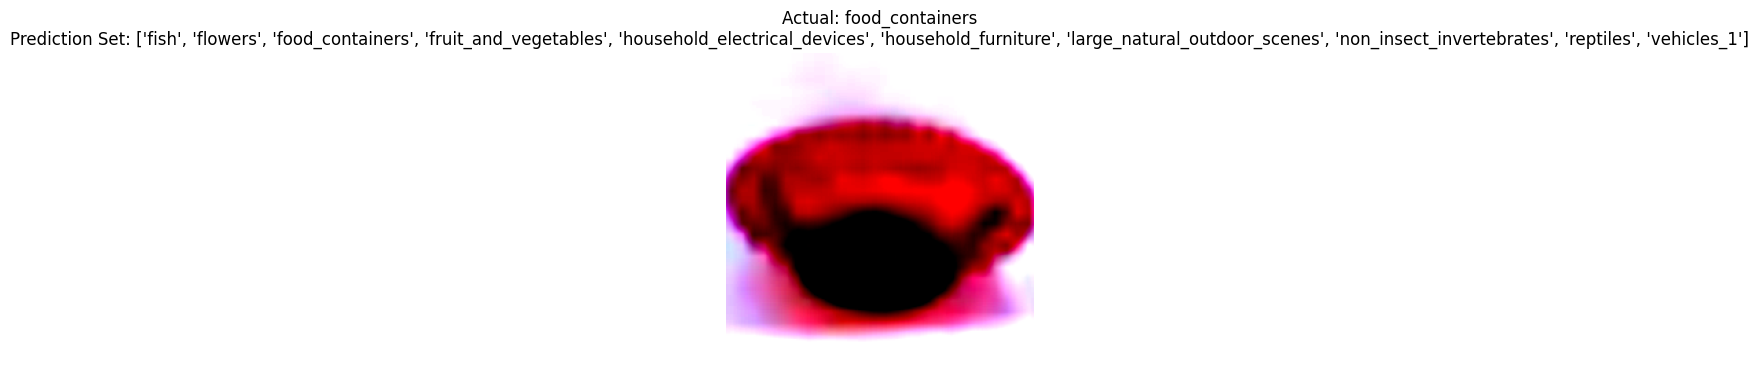

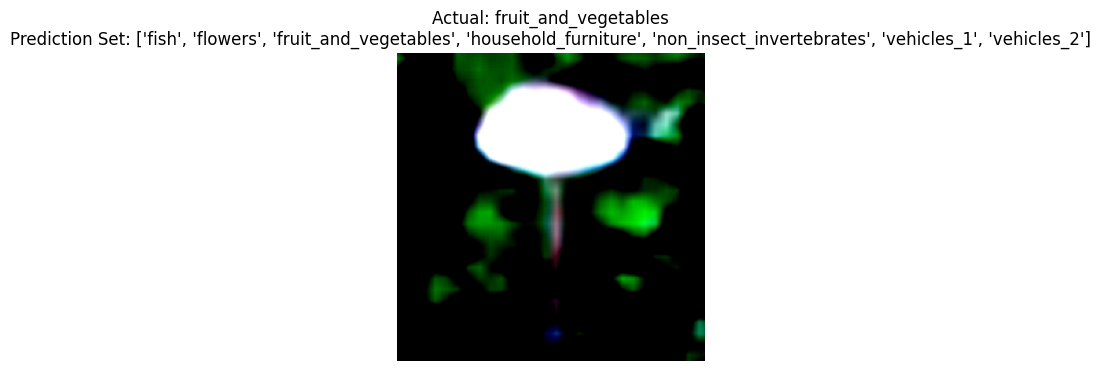

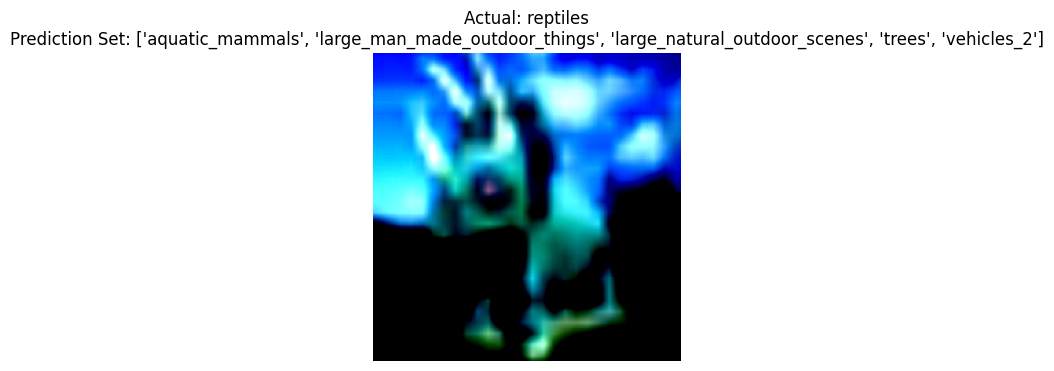

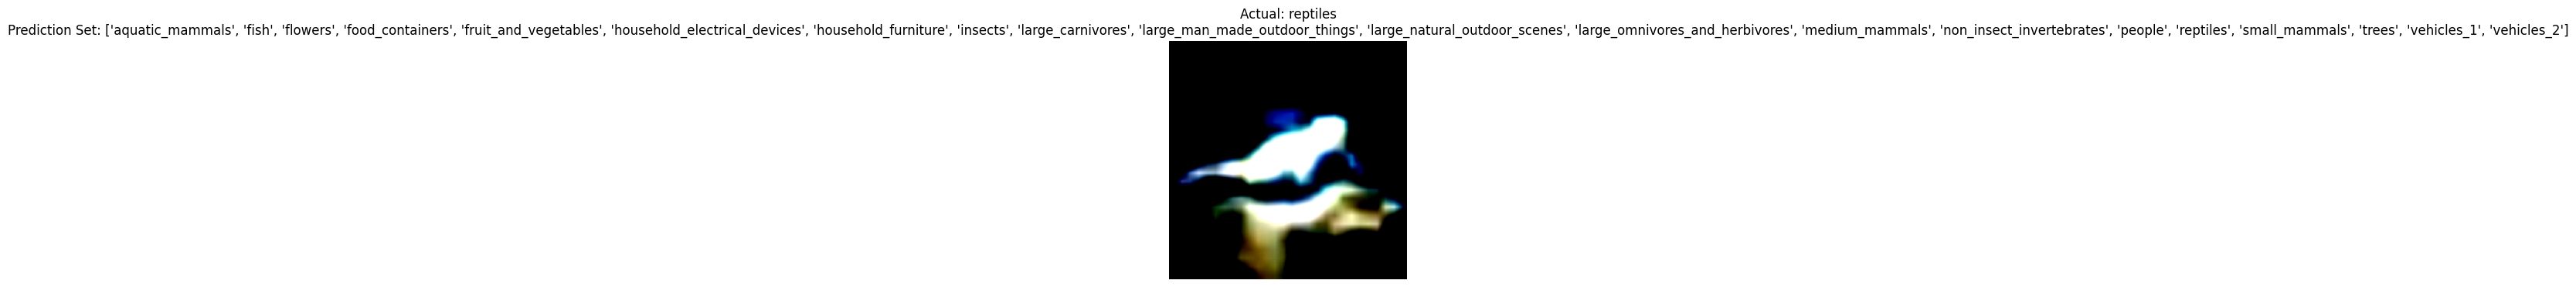

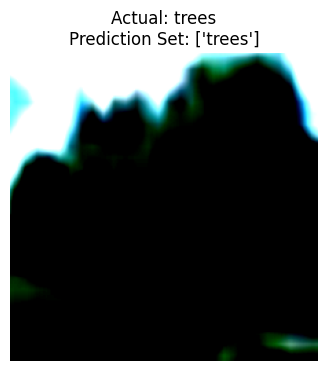

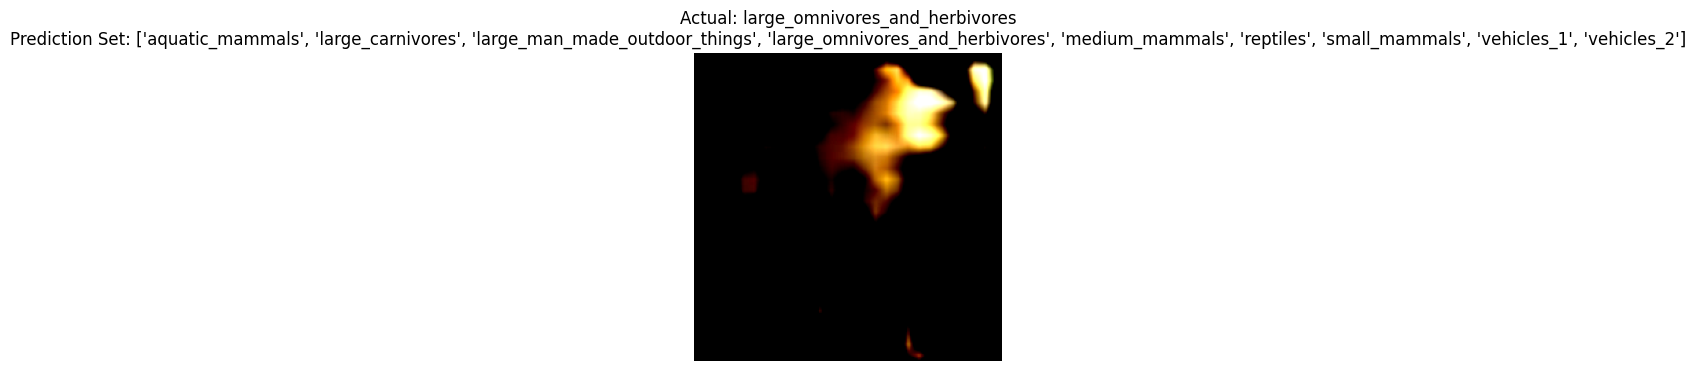

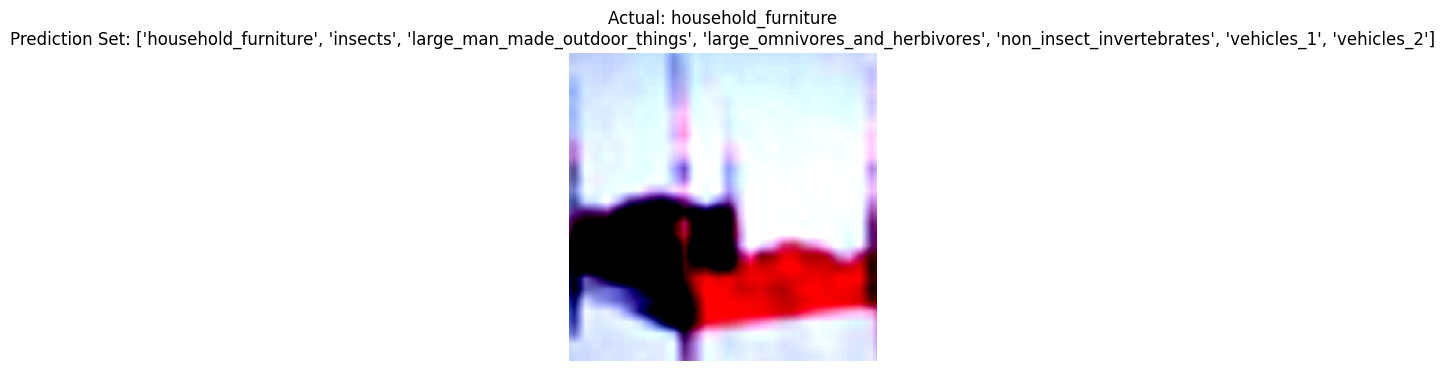

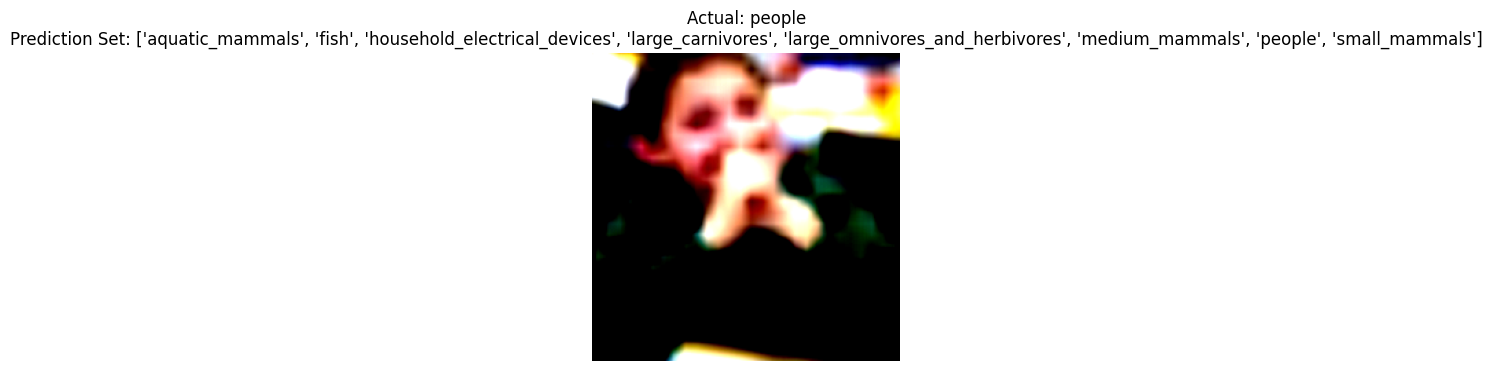

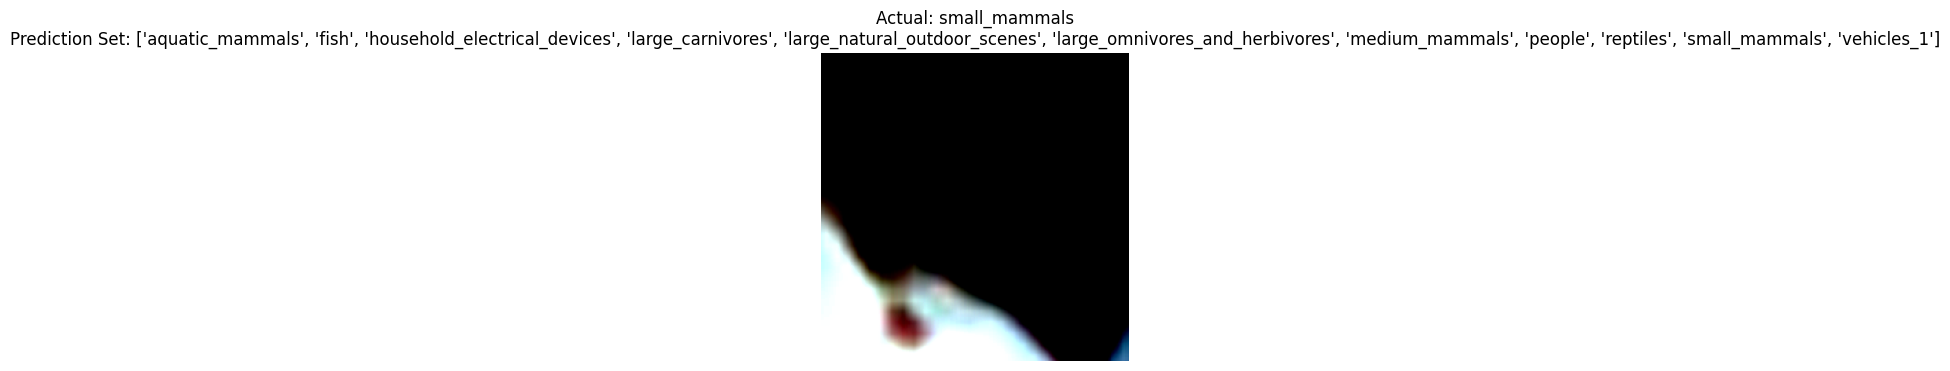

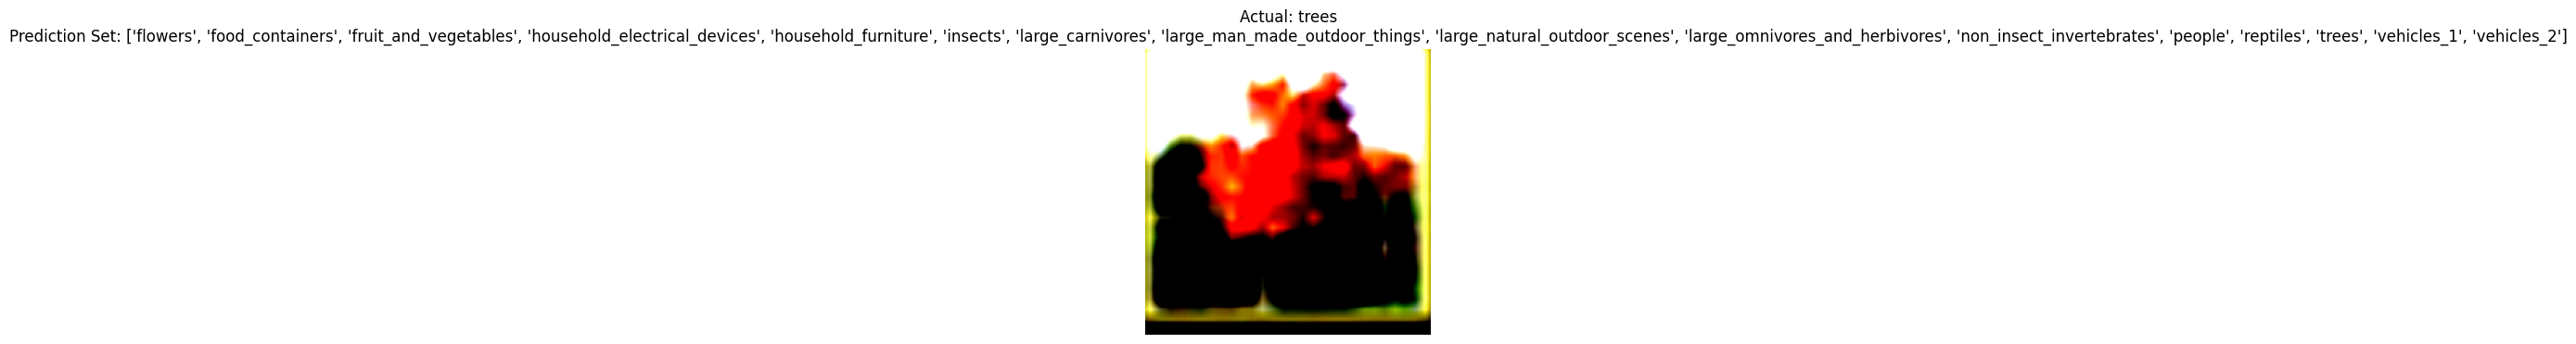

In [ ]:
import matplotlib.pyplot as plt

prediction_sets = []
class_names = selected_classes
model.eval()
model = model.to(device)
with torch.inference_mode():
  for i, (img, label) in enumerate(new_samples):
    img = img.to(device)
    outputs = model(img.unsqueeze(dim=0))
    softmax_probs = torch.softmax(outputs, dim=1).squeeze().cpu().numpy()
    prediction_set = np.where(softmax_probs >= (1-qhat))[0]
    prediction_set = [class_names[idx] for idx in prediction_set]

    plt.figure(figsize=(8, 4))
    plt.imshow(img.cpu().permute(1,2,0))
    plt.title(f"Actual: {class_names[label]}\nPrediction Set: {(prediction_set)}")
    plt.axis('off')
    plt.show()

In [ ]:
torch.save(model.state_dict(), 'model_superclass_weights.pth')